In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from typing import List
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
import pandas as pd
import numpy as np
from typing import List

def clean_and_encode_data(
    df: pd.DataFrame,
    numerical_cols: List[str] = ['Income'],
    categorical_cols: List[str] = ['Education', 'Marital_Status'],
) -> pd.DataFrame:
    
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

df_encoded = clean_and_encode_data(df)
df_encoded.head()


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,False,False,True,False,False,True,False,False,False,False


i fille din the missing values in income, then i used one hot encoding on education and merital status to make them ones and zeros.

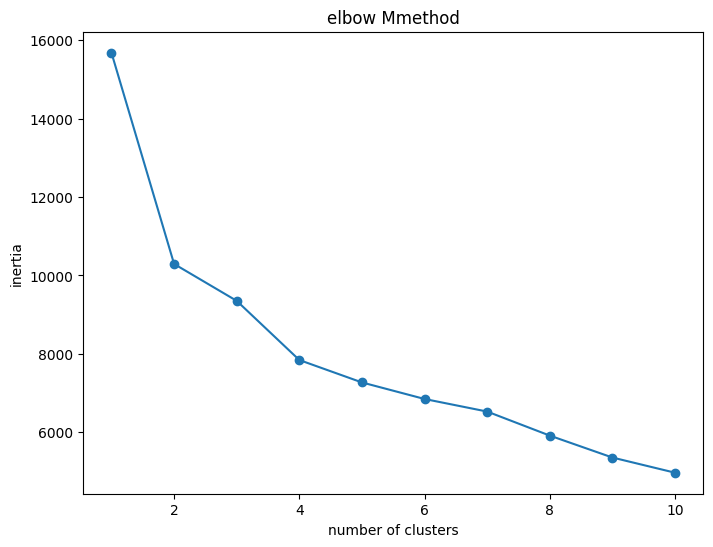

In [14]:
#2
def plot_elbow_method(df_encoded):
    features = [
        'Income', 'Recency', 'MntWines', 'MntMeatProducts', 
        'NumWebPurchases', 'NumStorePurchases', 'Marital_Status_Single'
    ]
    X = df_encoded[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    inertia = []
    cluster_range = range(1, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia, marker='o')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.title('elbow Mmethod')
    plt.show()

plot_elbow_method(df_encoded)

i started with selecting features then i used the elbow method and silhouette score to find the iptimal value of k. and then I plot the clusters.

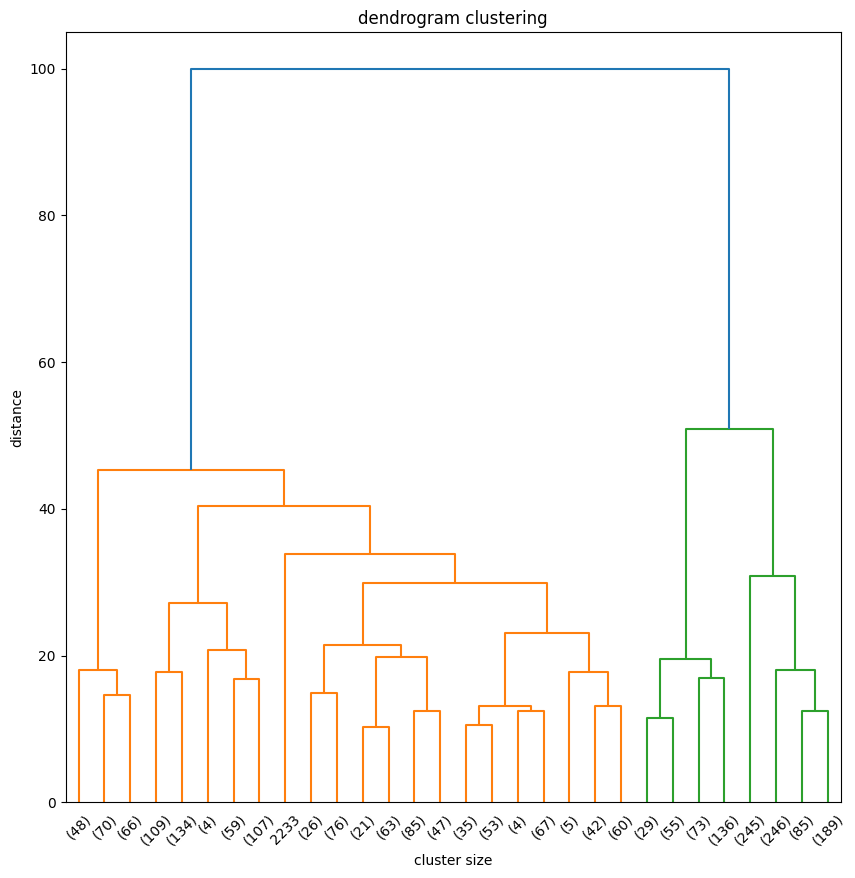

In [15]:
#3
def dendrogram_plot(df_encoded):
    features = [
        'Income', 'Recency', 'MntWines', 'MntMeatProducts', 
        'NumWebPurchases', 'NumStorePurchases', 'Marital_Status_Single'
    ]

    X = df_encoded[features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    linked = linkage(X_scaled, method='ward')

    plt.figure(figsize=(10, 10))
    dendrogram(linked, truncate_mode='lastp', p=30)
    plt.xlabel("cluster size")
    plt.ylabel("distance")
    plt.title("dendrogram clustering")
    plt.show()

dendrogram_plot(df_encoded)


i slected the dat that was actually usefull like income, and spending columns and purchases. to many clomns would be bad for the model. a good number of clusters i used kmeans and the elbow method and plotted the inerta aginst the number of clusters. the ideal number of clusters often. a good number of clusters is like 3-4. this apporch worked better for me than the otherones.

kmeans showed the number of cluster to be 3 while the hierarcheral clustering suggested 5 and becasue of that i think k means is better because it is simple this method is clear and 